# ex07-Hillshade from a Digital Elevation Model (DEM)

[Hillshading](https://en.wikipedia.org/wiki/Terrain_cartography#Shaded_relief), or shaded relief, shows the shape of the terrain in a realistic fashion by showing how the three-dimensional surface would be illuminated from a point light source. This aesthetic styling creates an almost photographic illusion, which is easy to grasp so that we can understand the
variation in the terrain.

Hillshade is today almost exclusively computer-generated using digital elevation models (DEM), with a resulting different look and feel. Many software provide the function to converted DEM to hillshade, such as Photoshop, QGIS, GRASS GIS or ArcMap's Spatial Analyst extension.

This note will show you how to create a hillshade from a DEM based on the hillshade function extracted from [EarthPy](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html). We will also apply xarray to read and preprocess the DEM data that can be downloaded from Downloading from https://ndownloader.figshare.com/articles/8259098/versions/2.

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Define hillshade function

The calculation of hillshade uses the altitude and azimuth properties to specify the sun's position.

- Azimuth and altitude

The properties altitude and azimuth together indicate the sun's relative position that will be used for creating any 3D model (hillshade or shaded relief). Altitude is the sun's angle of elevation above the horizon and ranges from 0 to 90 degrees. A value of 0 degrees indicates that the sun is on the horizon, that is, on the same horizontal plane as the frame of reference. A value of 90 degrees indicates that the sun is directly overhead.

This function is extracted  from from [EarthPy](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html). An alternative could be found from [here](https://github.com/jcaraban/map/blob/master/python/hill.py), which also added an extra input parameter of Z factor. The z-factor is a scaling factor used to convert the elevation values for two purposes:

- To convert the elevation units (such as meters or feet) to the horizontal coordinate units of the dataset, which may be feet, meters, or degrees.
- To add vertical exaggeration for visual effect.

In [2]:
def func_hillshade(arr, azimuth=30, altitude=30):
    """Create hillshade from a numpy array containing elevation data.
    Parameters
    ----------
    arr : numpy array of shape (rows, columns)
        Numpy array containing elevation values to be used to created hillshade.
    azimuth : float (default=30)
        The desired azimuth for the hillshade.
    altitude : float (default=30)
        The desired sun angle altitude for the hillshade.
    Returns
    -------
    numpy array
        A numpy array containing hillshade values.
    Example
    -------
    .. plot::
        >>> import matplotlib.pyplot as plt
        >>> import rasterio as rio
        >>> import earthpy.spatial as es
        >>> from earthpy.io import path_to_example
        >>> with rio.open(path_to_example('rmnp-dem.tif')) as src:
        ...     dem = src.read()
        >>> print(dem.shape)
        (1, 187, 152)
        >>> squeezed_dem = dem.squeeze() # remove first dimension
        >>> print(squeezed_dem.shape)
        (187, 152)
        >>> shade = es.hillshade(squeezed_dem)
        >>> plt.imshow(shade, cmap="Greys")
        <matplotlib.image.AxesImage object at 0x...>
    """
    try:
        x, y = np.gradient(arr)
    except:
        raise ValueError("Input array should be two-dimensional")

    if azimuth <= 360.0:
        azimuth = 360.0 - azimuth
        azimuthrad = azimuth * np.pi / 180.0
    else:
        raise ValueError(
            "Azimuth value should be less than or equal to 360 degrees"
        )

    if altitude <= 90.0:
        altituderad = altitude * np.pi / 180.0
    else:
        raise ValueError(
            "Altitude value should be less than or equal to 90 degrees"
        )

    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)

    shaded = np.sin(altituderad) * np.sin(slope) + np.cos(
        altituderad
    ) * np.cos(slope) * np.cos((azimuthrad - np.pi / 2.0) - aspect)

    return 255 * (shaded + 1) / 2

## Open up the DEM

Set all terrain values < 0 to nan.

In [12]:
infile = "data/es_dem/pre_DTM.tif"
da_dem = xr.open_rasterio(infile).drop('band')[0]
nodata = da_dem.nodatavals[0]
da_dem = da_dem.where(da_dem>nodata, np.nan)
arr_dem= da_dem.values

## Calculate hillshade

In [13]:
arr_hillshade = func_hillshade(arr_dem)

## Visualization

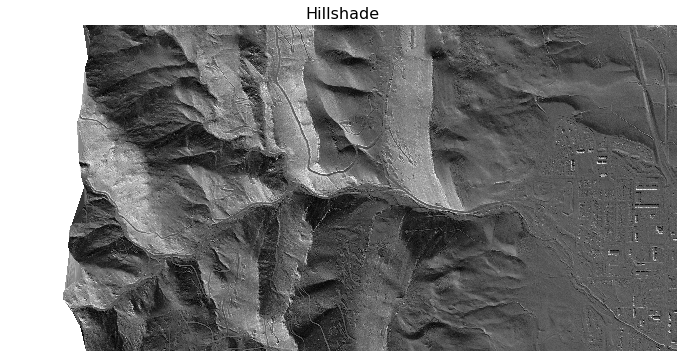

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pcolormesh(da_dem.x,
              da_dem.y,
              arr_hillshade, 
              cmap='Gray'
             )
ax.axis('off')
_ = ax.set_title("Hillshade in grey", fontsize=16)

***A colorful view***

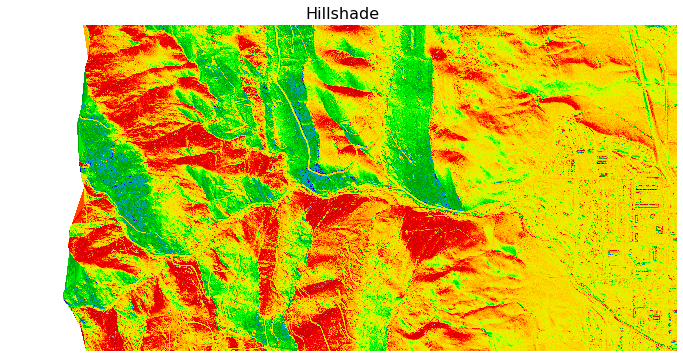

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pcolormesh(da_dem.x,
              da_dem.y,
              arr_hillshade, 
              cmap='Spectral'
             )
ax.axis('off')
_ = ax.set_title("Hillshade in color", fontsize=16)

## References

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

https://en.wikipedia.org/wiki/Terrain_cartography#Shaded_relief

http://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/hillshade-function.htm

https://github.com/jcaraban/map/wiki/Hillshade

https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html

https://github.com/jcaraban/map/blob/master/python/hill.py